# Analytical calculation

In [11]:
import sympy as sy

# Define the symbols
x, y = sy.symbols("x y")

# Define the integrand function
f = x**2 + y**3

# Calculate the first integral dy
I1 = sy.integrate(f, (y, x, 2*x))

# Calculate the second integral dx
I = sy.integrate(I1, (x, 0, 1))

print(f"The double integral results in, I = {I.evalf():.1f}") # evalf() converts the symbolic value to a numerical value

The double integral results in, I = 1.0


# Numerical calculation

In [97]:
import sympy as sy
from sympy.utilities import lambdify

# Define the integrand function
def f(x, y):
    
    f = x**2 + y**3 
    f = lambdify((x, y), f)
    
    return f

def simpson_integral(f, k, ay, by, ax, bx):
    
    """
    f: function to be integrated
    
    ay, by: interval of y
    
    ax, bx: interval of x
    
    k: data points of the interval [a, b]
       
    """
    # Calculate the first integral
    hy = (by - ay)/k 
    
    # Initialize the result of the integration dy
    sum_y = 0.0
    
    for i in range(k + 1):
        
        # Data points of y in the interval [ay, by]
        y_i = ay + i*hy # In every loop y takes the value of the next data point
        
        if i == 0: # calculates f(x_o)
            sum_y += f(x, ay) # Upgrade the result
        
        elif i == k : # calculates f(x_k)
            sum_y += f(x, by)
            
        elif i % 2 == 1: # calculates every term in 2*(f(x_1) + f(x_3) +...+ f(x_k-1))
            sum_y += 4*f(x, y_i)
        
        elif i % 2 == 0: # calculates every term in 4*(f(x_2) + f(x_4) +...+ f(x_k))
            sum_y += 2*f(x, y_i)
            
    fy = (hy/3)*sum_y # result of the first integral
    fy = lambdify(x, fy)
    
    hx = (bx - ax)/k
    
    # Initialize the result of the second integration dx
    sum_x = 0.0
    
    for j in range(k + 1):
        x_i = ax + j*hx # In every loop x takes the value of the next data point
        
        if j == 0: # calculates f(x_o)
            sum_x += fy(ax) # Upgrade the result
        
        elif j == k: # calculates f(x_k)
            sum_x += fy(bx)
            
        elif j % 2 == 1: # calculates every term in 2*(f(x_1) + f(x_3) +...+ f(x_k-1))
            sum_x += 4*fy(x_i)
        
        elif j % 2 == 0: # calculates every term in 4*(f(x_2) + f(x_4) +...+ f(x_k))
            sum_x += 2*fy(x_i)
    
    # Result of the double integral
    I = (hx/3)*sum_x
    
    return (I)

# Define the symbols x y, we use sympy for the firt integration since the limits are x, 2x
# Later for the numerical purposes we can evaluate the function using lambdify command
x, y = sy.symbols("x y")

# Define the limits of integration
ay =  x
by =  2*x

ax = 0
bx = 1

# Define the number of data points in the interval of integration
k = 10

result = simpson_integral(f(x, y), k, ay, by, ax, bx)
print(f"The double integral results in, I = ", result) 

The double integral results in, I =  1.0000500000000003


# Plot to show the convergence of Simpson's rule in the second integral dx

## This is the second step of the integration

For 2 data points: I = 1.03125
For 4 data points: I = 1.001953125
For 6 data points: I = 1.0003858024691354
For 8 data points: I = 1.0001220703125
For 10 data points: I = 1.00005


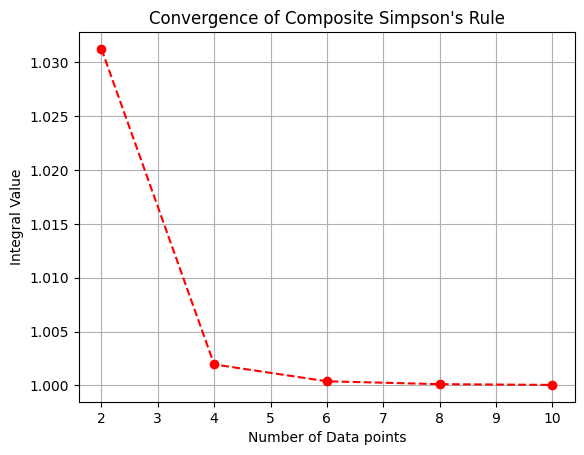

In [2]:

import numpy as np
import matplotlib.pyplot as plt

# Define the function to be integrated
def f(x):
    return x**3 + (15/4) * x**4  # This is the function that occurs after the first  integration in y


def simpsons_x(f, a, b, k):
    hx = (bx - ax)/k
    
    sum_x = 0.0
    
    for j in range(k + 1):
        x_i = ax + j*hx # In every loop x takes the value of the next data point
        
        if j == 0: # calculates f(x_o)
            sum_x += f(ax) # Upgrade the result
        
        elif j == k: # calculates f(x_k)
            sum_x += f(bx)
            
        elif j % 2 == 1: # calculates every term in 2*(f(x_1) + f(x_3) +...+ f(x_k-1))
            sum_x += 4*f(x_i)
        
        elif j % 2 == 0: # calculates every term in 4*(f(x_2) + f(x_4) +...+ f(x_k))
            sum_x += 2*f(x_i)
    
    I = (hx/3)*sum_x
    return I

# Define the limits of integration
ax = 0
bx = 1

# Define the number of data points in the interval of integration
k= 10

# Number of points in the interval
n_int = [n_x for n_x in range(2, k + 1, 2)]

# Calculate the second integral using different number of data points
results = []
for n in n_int:
    result = simpsons_x(f, ax, bx, n)
    results.append(result)
    print(f"For {n} data points: I = {result}")

# Plot the convergence
plt.plot(n_int, results, marker='o', linestyle='--', color='r')
plt.xlabel('Number of Data points')
plt.ylabel('Integral Value')
plt.title('Convergence of Composite Simpson\'s Rule')
plt.grid(True)
plt.show()


# Monte Carlo calculation

The mean value of the procedure and solution of the integral is:  1.0809390340007052  +-  0.10867129260918733


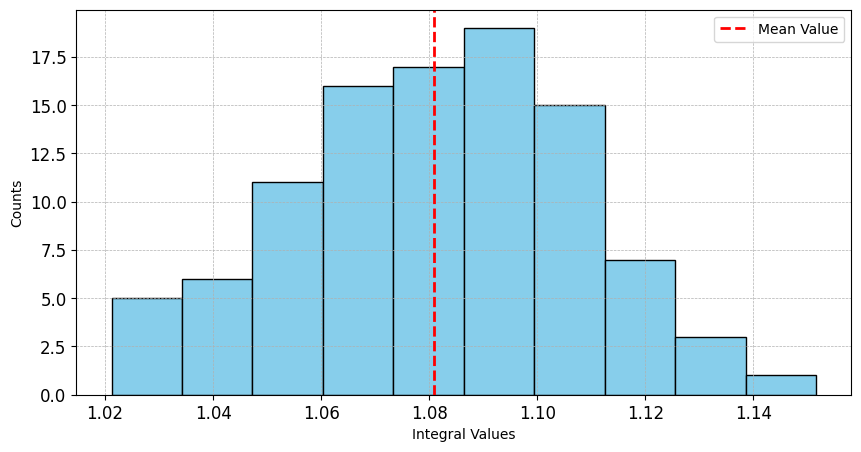

In [4]:
import numpy as np

# Define the function 
def f(x, y):
    
    f = x**2 + y**3
    
    return f

def monte_integral(k, ax, bx, ay, by):
    
    # Randomly sample x, y and z
    x_rnd = np.random.random(k)
    y_rnd = np.random.random(k)
    z_rnd = np.random.random(k)
    
    # Create a meshgrid to evaluate the function and calculate the z values of the surface
    x, y = np.meshgrid(x_rnd, y_rnd)
    
    # For every random data point calculate its difference from the surface
    h = z_rnd - f(x, y)
    
    # Find all the z values that are below the surface
    n_i = sum(h < 0)
    
    # Sum the data points that are below the surface
    n =sum(n_i)/len(n_i)
    
    # Calculate the frame area 
    A = (bx - ax)*(by(bx) - ay(ax))*(np.max(z_rnd) - np.min(z_rnd))
    
    # Calculate the solution of the integral 
    I = n*A/k
    
    return I

# Define the limits of integration
ax = 0
bx = 1

ay = lambda x: x
by = lambda x: 2*x

# Define the number of data points in which x, y and z will be divided
k = 1000

# Do the process a few times and take a solution the mean value 
I_list = []
for i in range(100):
    
    I_i = monte_integral(k, ax, bx, ay, by)
    
    I_list.append(I_i)

# The solution of the double integral
I_mean = np.mean(I_list)

# Calculate the standard deviation of the results
I2 = [x**2 for x in I_list]

I2_sum = sum(I2)

n = len(I2)

s = np.sqrt(I2_sum/(n*(n - 1)))

print("The mean value of the procedure and solution of the integral is: ", I_mean, " +- ", s)

# Display the results
plt.figure(figsize=(10, 5))
plt.hist(I_list, bins=10, color='skyblue', edgecolor='black')
plt.axvline(x=I_mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean Value')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=10)
plt.xlabel('Integral Values')
plt.ylabel('Counts')
plt.legend()
plt.show()

# Plot the surface f(x, y) = x**2 + y**3

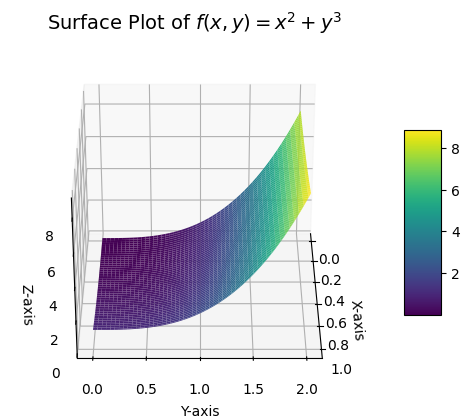

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def func(x, y):
    return x**2 + y**3

# Create a meshgrid for x and y
x = np.linspace(0, 1, 100)
y = np.linspace(0, 2, 100)
x, y = np.meshgrid(x, y)

# Calculate the function values
z = func(x, y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

# Costumize the result
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

ax.set_title('Surface Plot of $f(x, y) = x^2 + y^3$', fontsize=14)

# Add a color bar
fig.colorbar(surf, shrink=0.5, aspect=5)

# Improve viewing angle
ax.view_init(elev=30, azim=0)

# Show the plot
plt.show()